In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split

# Установка seed для стандартного генератора случайных чисел Python
random.seed(42)

# Установка seed для NumPy (если используете его)
np.random.seed(42)

# Установка seed для PyTorch
torch.manual_seed(42)

# Если используете CUDA
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)  # Если у вас несколько GPU

# Для обеспечения полной повторяемости (этот шаг замедляет выполнение на GPU)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Normal

In [ ]:
# Fedor
subj_path = "..\\data\\Fedor\\Raw\\preproc_angles\\1\\"
fs = 500

N_files = 4

i = 0

global_max = 0
global_min = 1000
for i in range(N_files):
    arr = np.load(subj_path + "000" + str(i) + ".npz")
    for j in range(20):
        data_angle = arr["data_angles"][:, j]

        local_max = np.max(data)
        local_min = np.min(data)

        if local_max > global_max:
            global_max = local_max

        if local_min < global_min:
            global_min = local_min

global_min, global_max

(-0.9381682909802775, 1.888109145630998)

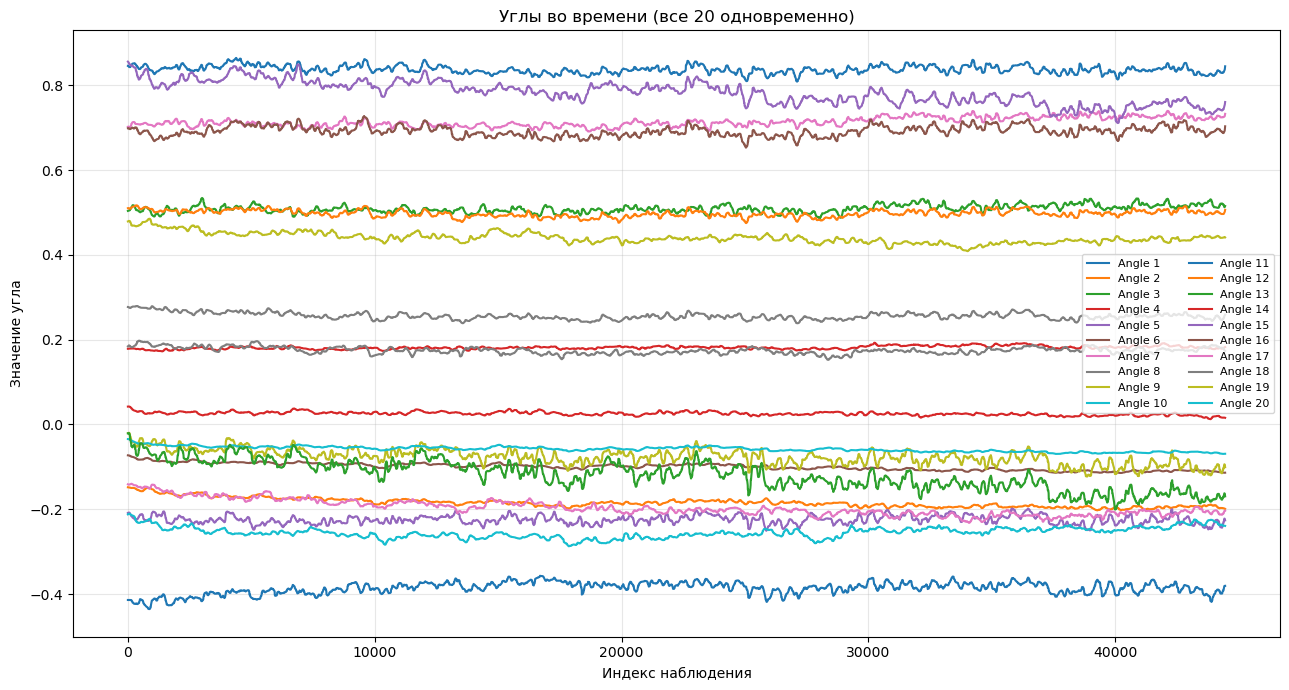

In [64]:
i = 3
arr = np.load(subj_path + "000" + str(i) + ".npz")
data = arr["data_angles"]  # (44459, 20)

plt.figure(figsize=(13, 7))

for i in range(0, 20, 1):
    plt.plot(data[:, i], label=f"Angle {i+1}")

plt.title("Углы во времени (все 20 одновременно)")
plt.xlabel("Индекс наблюдения")
plt.ylabel("Значение угла")
plt.legend(ncol=2, fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Amputee

In [17]:
# Alexander Chevcov
subj_path = "..\\data\\Alexander Chevcov\\Simple(6 electrodes)\\Preprocessed\\Simple3\\"
fs = 500

N_files = 8

i = 0

global_max = 0
global_min = 1000
for i in range(N_files):
    arr = np.load(subj_path + "000" + str(i) + ".npz")
    data = arr["data_angles"]

    local_max = np.max(data)
    local_min = np.min(data)

    if local_max > global_max:
        global_max = local_max

    if local_min < global_min:
        global_min = local_min

global_min, global_max

(-0.8739466228354406, 1.8886734658161484)

(-0.9706596358712123, 1.88351388060397)
(-1.0566241192975252, 1.8884811105869512)
(-1.1021300940967378, 1.799844281167384)
(-1.1117854730198096, 1.8779666126960257)

Aplasia

In [37]:
# Nastya
subj_path = "..\\data\\Nastya\\Simple\\Preprocessed\\Simple4\\5\\"
fs = 500

N_files = 8

i = 0

global_max = 0
global_min = 1000
for i in range(N_files):
    arr = np.load(subj_path + "000" + str(i) + ".npz")
    data = arr["data_angles"]

    local_max = np.max(data)
    local_min = np.min(data)

    if local_max > global_max:
        global_max = local_max

    if local_min < global_min:
        global_min = local_min

global_min, global_max

(-1.0747459870643776, 1.8458533601430775)

Splitter

In [ ]:
subj_path = "..\\data\\Fedor\\Raw\\preproc_angles\\1\\"
fs = 500


def train_test_split(data, N_parts, num_of_part):
    N_samples = len(data)

    l_idx = int((N_samples * num_of_part) / N_parts)
    h_idx = int((N_samples * (num_of_part + 1)) / N_parts)

    print(data[:l_idx, :].shape)
    data_train = data[:l_idx, :]
    # data_train = np.concatenate([data[:l_idx, :], data[h_idx:,]], axis=0)
    print(data_train.shape)
    data_test = data[l_idx:, :]
    # data_test = data[l_idx:h_idx, :]

    return data_train, data_test


N_files = 4
data_list_train = list()
data_list_test = list()
label_list_train = list()
label_list_test = list()

N_parts = 10
train_num_of_part = 8

i = 0
arr = np.load(subj_path + "000" + str(i) + ".npz")

std_coef = arr["std_coef"]
data = arr["data_myo"]
label = arr["data_angles"]

data_train, data_test = train_test_split(data, N_parts, train_num_of_part)
# label_train, label_test = train_test_split(label, N_parts, num_of_part)


(35561, 6)
(35561, 6)


In [80]:
N_samples = len(data)

l_idx = int((N_samples * num_of_part) / N_parts)
h_idx = int((N_samples * (num_of_part + 1)) / N_parts)

l_idx, h_idx

(22226, 26671)

In [83]:
data_train.shape, data_test.shape

((35561, 6), (8891, 6))